### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [250]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file and explore the data




In [251]:
data = pd.read_csv('data/coupons.csv')

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [252]:
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [253]:
data['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [254]:
data['passanger'].unique()

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

In [255]:
data['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [256]:
data['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [257]:
data['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [258]:
data['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

In [259]:
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [260]:
data['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

2. Investigate the dataset for missing or problematic data.

In [237]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...
   1. Missing Data will be handled separately based on Coupon types like Restaurant(<20),Coffee House, Carry out & Take away, Bar, Restaurant(20-50)
   2. And based the use case will drop nulls that can affect the use case senario

In [262]:
# find missing data on complete data set
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [264]:
# find missing data on complete data set where response is NaN --> no missing data on response
data['Y'].isnull().sum()

0

4. What proportion of the total observations chose to accept the coupon?
   ensure that no missing data on column 'Y' i.e no missing the on response of acceptence or denial of coupon.


In [265]:
# total observations chose to accept the coupon
total_observations_who_accepted_coupon = data.query('Y == 1')
percent_of_observations_who_accepted_coupon = round(total_observations_who_accepted_coupon.shape[0] * 100 / data.shape[0], 2)
percent_of_observations_who_accepted_coupon

56.84

5. Use a bar plot to visualize the `coupon` column.

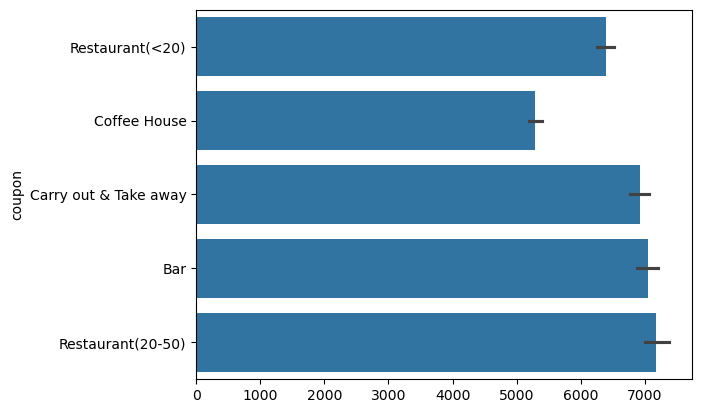

In [233]:
fig = go.Figure()
sns.barplot(data['coupon'])
plt.savefig('images/coupons.png')

6. Use a histogram to visualize the temperature column.

<Axes: >

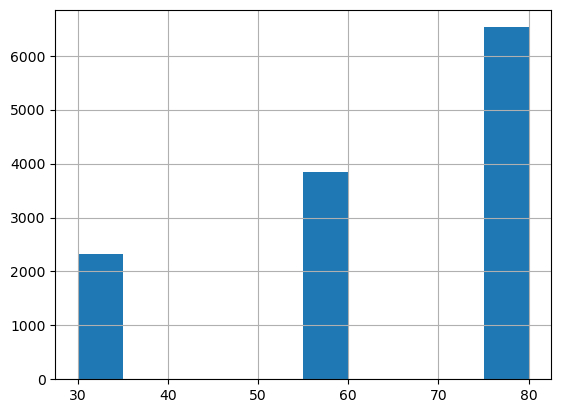

In [59]:
data['temperature'].hist()

In [266]:
# total accepted all coupons
total_accepted_all_coupons = data.query('Y == 1').shape[0]
total_accepted_all_coupons

7210

In [278]:
# Total percentage of drivers accepted the coupons is 
percent = round(total_accepted_all_coupons * 100 / data.shape[0], 2)
percent

56.84

In [267]:
# percent of drivers accepted 'Bar' coupon
drivers_accepted_Bar_coupon = data.query('(Y == 1) and (coupon == "Bar")')
percent = round(drivers_accepted_Bar_coupon.shape[0] * 100 / total_accepted_all_coupons, 2)
percent

11.47

In [268]:
# percent of drivers accepted 'Restaurant(<20)' coupon
drivers_accepted_Restaurant_less_than_20_coupon = data.query('(Y == 1) and (coupon == "Restaurant(<20)")')
percent = round(drivers_accepted_Restaurant_less_than_20_coupon.shape[0] * 100 / total_accepted_all_coupons, 2)
percent

27.32

In [269]:
# percent of drivers accepted 'Coffee House' coupon
drivers_accepted_Coffee_House_coupon = data.query('(Y == 1) and (coupon == "Coffee House")')
percent = round(drivers_accepted_Coffee_House_coupon.shape[0] * 100 / total_accepted_all_coupons, 2)
percent

27.67

In [270]:
# percent of drivers accepted 'Carry out & Take away' coupon
drivers_accepted_Carry_out_and_Take_away_coupon = data.query('(Y == 1) and (coupon == "Carry out & Take away")')
percent = round(drivers_accepted_Carry_out_and_Take_away_coupon.shape[0] * 100 / total_accepted_all_coupons, 2)
percent

24.41

In [271]:
# percent of drivers accepted 'Restaurant(20-50)' coupon
drivers_accepted_Restaurant_20_50_coupon = data.query('(Y == 1) and (coupon == "Restaurant(20-50)")')
percent = round(drivers_accepted_Restaurant_20_50_coupon.shape[0] * 100 / total_accepted_all_coupons, 2)
percent

9.13

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [70]:
# dataframe for Bar coupons
bar_coupons = data.query('coupon == "Bar"')

In [76]:
# check for null data
bar_coupons['Bar'].isnull().sum()

21

In [77]:
# dron null data from dataframe
bar_coupons = bar_coupons[bar_coupons['Bar'].notnull()]

In [78]:
# verify that null data is dropped
bar_coupons['Bar'].isnull().sum()

0

2. What proportion of bar coupons were accepted?


In [272]:
# percent of bar coupons accepted out of all accepted coupuns
bar_coupons_accepted = bar_coupons.query('Y == 1').shape[0]
round(bar_coupons_accepted * 100/total_accepted_all_coupons, 2)

11.36

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [125]:
# all drivers who accepted bar coupons
all_others_who_accepted_bar_coupons = bar_coupons.query('Y == 1')

In [273]:
# percent who went to a bar 4 or more times a month and accepted the coupon to all who accepted bar coupon
went_to_a_bar_4_or_more_times = bar_coupons.query('Y == 1').query(('Bar == "gt8"') or ('Bar == "4~8"'))
acceptance_rate = round(went_to_a_bar_4_or_more_times.shape[0] * 100 / all_others_who_accepted_bar_coupons.shape[0], 2)
acceptance_rate

4.4

In [274]:
# percent who went to a bar 3 or few times a month and accepted the coupon to all who accepted bar coupon
went_to_a_bar_3_or_fewer_times = bar_coupons.query('Y == 1').query(('Bar == "less1"') or ('Bar == "1~3"'))
acceptance_rate = round(went_to_a_bar_3_or_fewer_times.shape[0] * 100 / all_others_who_accepted_bar_coupons.shape[0], 2)
acceptance_rate

30.89

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [275]:
# for 25 years or less
ages = ['21', 'below21']
# for bar going frequnecy 1 time or more
bar_freq = ['1~3', 'gt8', '4~8']
# drivers who go to a bar more than once a month and are over the age of 25
drivers_who_go_to_a_bar_more_than_once_and_over_age_of_25 = bar_coupons.query('(Y == 1) and (Bar in @bar_freq) and (age not in @ages)')
# percent of acceptence of Bar coupon of drivers who go to a bar more than once a month and are over the age of 25 to all who accepted bar coupon
round(drivers_who_go_to_a_bar_more_than_once_and_over_age_of_25.shape[0] * 100 / all_others_who_accepted_bar_coupons.shape[0], 2)

35.65

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [276]:
# for bar going frequnecy 1 time or more
bar_freq = ['1~3', 'gt8', '4~8']

drivers_who_go_to_bars_more_than_once_and_not_kid_as_passenger_and_occupation_other_than_farming_fishing_forestry = bar_coupons.query('(Y == 1) and (Bar in @bar_freq) and (occupation != "Farming Fishing & Forestry") and (passanger != "Kid(s)")')
# acceptance percentage between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
round(drivers_who_go_to_bars_more_than_once_and_not_kid_as_passenger_and_occupation_other_than_farming_fishing_forestry.shape[0] * 100 / all_others_who_accepted_bar_coupons.shape[0], 2)

47.99

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [212]:
bar_freq = ['1~3', 'gt8', '4~8']
under_30_ages = ['21', '26', 'below21']
cheap_restarent_more_than_4_times_freq = ['4~8', 'gt8' ]
less_than_50k = ['$37500 - $49999', 'Less than $12500']
# go to bars more than once a month, had passengers that were not a kid, and were not widowed
qry_1 = '(Y == 1) and (Bar in @bar_freq) and (passanger != "Kid(s)") and (maritalStatus != "Widowed")'
# go to bars more than once a month and are under the age of 30
qry_2 = '(Y == 1) and (age in @under_30_ages)'
# go to cheap restaurants more than 4 times a month and income is less than 50K
qry_3 = '(Y == 1) and (RestaurantLessThan20 in @cheap_restarent_more_than_4_times_freq) and (income in @less_than_50k)'
all_others_who_accepted_coupons = data.query('Y == 1')
qry_1_ratio = round(bar_coupons.query(qry_1).shape[0] * 100 / all_others_who_accepted_bar_coupons.shape[0], 2)
qry_2_ratio = round(bar_coupons.query(qry_2).shape[0] * 100 / all_others_who_accepted_bar_coupons.shape[0], 2)
qry_3_ratio = round(bar_coupons.query(qry_3).shape[0] * 100 / all_others_who_accepted_bar_coupons.shape[0], 2)
print(qry_1_ratio)
print(qry_2_ratio)
print(qry_3_ratio)

47.99
53.36
9.65


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Total number of drivers who accepted any coupouns: 7210.

Percent of drivers who accepted Bar coupons: 11.36

Percent between those who went to a Bar 3 or fewer times a month and all who accepted Bar coupons: 38.89

Percent between those who went to a Bar 4 or more times a month and all who accepted Bar coupons: 4.4

Percent of the acceptance rate between drivers who go to a Bar more than once a month and are over the age of 25 to the all others who accepted Bar coupons: 35.65

Percent of the acceptance rate between drivers who go to Bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 47.99

Percent of the acceptance rate of drivers who go to Bar more than once a month, had passengers that were not a kid, and were not widowed: 47.99

Percent of the acceptance rate of drivers who go to Bar more than once a month and are under the age of 30: 53.36

Percent of the acceptance rate of drivers who go to Bar more than 4 times a month and income is less than 50K: 9.65

*** Conclusion *** : about 11.36% Bar coupouns accepted out of total number of all accepted coupons. out of which about 53.36% of Bar coupons accepted by those who go to Bar more than once a month and are under the age of 30

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investigating the Restaurant(20-50) Coupons**

1. Create a new `DataFrame` that contains just the Restaurant(20-50) coupons.


In [165]:
restarents_20_to_50 = data.query('coupon == "Restaurant(20-50)"')
restarents_20_to_50

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
14,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
18,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12657,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12661,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12669,No Urgent Place,Partner,Sunny,30,10AM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12676,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1


In [166]:
# check for nulls in the column
restarents_20_to_50['Restaurant20To50'].isnull().sum()

22

In [167]:
# examine data containing nulls for coupon is Restaurant(20-50)
restarents_20_to_50[restarents_20_to_50['Restaurant20To50'].isnull()].head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
853,No Urgent Place,Partner,Sunny,80,10AM,Restaurant(20-50),1d,Male,41,Married partner,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
1167,No Urgent Place,Partner,Sunny,80,10AM,Restaurant(20-50),1d,Male,26,Unmarried partner,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
1207,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,31,Married partner,...,NaN,4~8,4~8,NaN,1,1,0,0,1,1
1211,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,31,Married partner,...,NaN,4~8,4~8,NaN,1,1,0,0,1,0
9139,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(20-50),1d,Male,below21,Single,...,never,less1,never,NaN,1,1,0,0,1,0


In [181]:
# drop rows which contains null in column of RestaurantLessThan20 
restarents_20_to_50 = restarents_20_to_50[restarents_20_to_50['Restaurant20To50'].notnull()]

In [216]:
# verify to ensure that dataset will not have null values for the column Restaurant(20-50)
restarents_20_to_50['Restaurant20To50'].isnull().sum()

1470

2. What portion of Restaurant20To50 coupons were accepted ?

In [227]:
# percent of accepentence of coupon 'Restaurant20To50' to all accepeted coupouns
total_accepted_Restaurant20To50_coupon = restarents_20_to_50.query('Y == 1')
round(total_accepted_Restaurant20To50_coupon.shape[0] * 100 / total_accepted_all_coupons, 2)

9.03

In [217]:
all_others_who_accepted_Restaurant20To50_coupons = restarents_20_to_50.query('Y == 1').shape[0]

3. Compare the acceptance rate between those who went to a Restaurant20To50 3 or fewer times a month to those who went more.

In [218]:
# rate between those who went to a Restaurant20To50 3 or fewer times 
Restaurant20To50_3_or_fewer_times = ['less1', '1~3']
went_to_a_Restaurant20To50_3_or_fewer_times = restarents_20_to_50.query('(Y == 1) and Restaurant20To50 in @Restaurant20To50_3_or_fewer_times')
rate = round(went_to_a_Restaurant20To50_3_or_fewer_times.shape[0] * 100 / all_others_who_accepted_Restaurant20To50_coupons, 2)
rate

77.42

In [219]:
# rate between those who went to a Restaurant20To50 4 times or more 
Restaurant20To50_4_or_more_times = ['gt8', '4~8']
went_to_a_Restaurant20To50_4_or_more_times = restarents_20_to_50.query('(Y == 1) and Restaurant20To50 in @Restaurant20To50_4_or_more_times')
rate = round(went_to_a_Restaurant20To50_4_or_more_times.shape[0] * 100 / all_others_who_accepted_Restaurant20To50_coupons, 2)
rate

12.14

4. Compare the acceptance rate between drivers who go to a Restaurant20To50 more than once a month and are over the age of 25 to the all others. Is there a difference?

In [220]:
Restaurant20To50_more_than_once = ['1~3', 'gt8', '4~8']
ages_over_25 = ['46', '26', '31', '41', '50plus', '36']

drivers_who_go_to_a_Restaurant20To50_more_than_once_and_age_over_25 = restarents_20_to_50.query('(Y == 1) and (Restaurant20To50 in @Restaurant20To50_more_than_once) and (age in @ages_over_25)')
rate = round(drivers_who_go_to_a_Restaurant20To50_more_than_once_and_age_over_25.shape[0] * 100 / all_others_who_accepted_Restaurant20To50_coupons, 2)
rate

33.95

5. Use the same process to compare the acceptance rate between drivers who go to Restaurant20To50 more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [221]:
Restaurant20To50_more_than_once = ['1~3', 'gt8', '4~8']
drivers_who_go_to_a_Restaurant20To50_more_than_once_and_had_passenger_not_kid_occupation_other_than_farming_fishing_forestry = restarents_20_to_50.query('(Y == 1) and (Restaurant20To50 in @Restaurant20To50_more_than_once) and (occupation != "Farming Fishing & Forestry") and (passanger != "Kid(s)")')
rate = round(drivers_who_go_to_a_Restaurant20To50_more_than_once_and_had_passenger_not_kid_occupation_other_than_farming_fishing_forestry.shape[0] * 100 / all_others_who_accepted_Restaurant20To50_coupons, 2)
rate

39.17

6.Compare the acceptance rates between those drivers who:

- go to Restaurant20To50 more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to Restaurant20To50 more than once a month and are under the age of 30 *OR*
- go to Restaurant20To50 more than 4 times a month and income is more than 50K.

In [232]:
Restaurant20To50_more_than_once = ['1~3', 'gt8', '4~8']
under_30_ages = ['21', '26', 'below21']
Restaurant20To50_more_than_4_times_freq = ['4~8', 'gt8' ]
less_than_50k = ['$37500 - $49999', 'Less than $12500']
# go to Restaurant20To50 more than once a month, had passengers that were not a kid, and were not widowed
qry_1 = '(Y == 1) and (Restaurant20To50 in @Restaurant20To50_more_than_once) and (passanger != "Kid(s)") and (maritalStatus != "Widowed")'
# go to Restaurant20To50 more than once a month and are under the age of 30
qry_2 = '(Y == 1) and (age in @under_30_ages)'
# go to Restaurant20To50 restaurants more than 4 times a month and income is more than 50K
qry_3 = '(Y == 1) and (RestaurantLessThan20 in @Restaurant20To50_more_than_4_times_freq) and (income not in @less_than_50k)'
# go to Restaurant20To50 restaurants more than 4 times a month and income is less than 50K
qry_4 = '(Y == 1) and (RestaurantLessThan20 in @Restaurant20To50_more_than_4_times_freq) and (income in @less_than_50k)'
qry_1_ratio = round(restarents_20_to_50.query(qry_1).shape[0] * 100 / all_others_who_accepted_Restaurant20To50_coupons, 2)
qry_2_ratio = round(restarents_20_to_50.query(qry_2).shape[0] * 100 / all_others_who_accepted_Restaurant20To50_coupons, 2)
qry_3_ratio = round(restarents_20_to_50.query(qry_3).shape[0] * 100 / all_others_who_accepted_Restaurant20To50_coupons, 2)
qry_4_ratio = round(restarents_20_to_50.query(qry_4).shape[0] * 100 / all_others_who_accepted_Restaurant20To50_coupons, 2)
print(qry_1_ratio)
print(qry_2_ratio)
print(qry_3_ratio)
print(qry_4_ratio)

39.17
45.78
30.11
10.29


7. Based on these observations, what do you hypothesize about drivers who accepted the Restaurant20To50 coupons?

Total number of drivers who accepted any coupouns: 7210.

Percent of drivers who accepted Restaurant20To50 coupons: 9.03

Percent between those who went to a Restaurant20To50 3 or fewer times a month and all who accepted Restaurant20To50 coupons: 77.42

Percent between those who went to a Restaurant20To50 4 or more times a month and all who accepted Restaurant20To50 coupons: 12.14

Percent of the acceptance rate between drivers who go to a Restaurant20To50 more than once a month and are over the age of 25 to the all others who accepted Restaurant20To50 coupons: 33.95

Percent of the acceptance rate between drivers who go to Restaurant20To50 more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 39.17

Percent of the acceptance rate of drivers who go to Restaurant20To50 more than once a month, had passengers that were not a kid, and were not widowed:39.17

Percent of the acceptance rate of drivers who go to Restaurant20To50 more than once a month and are under the age of 30: 45.78

Percent of the acceptance rate of drivers who go to Restaurant20To50 more than 4 times a month and income is more than 50K: 30.11

Percent of the acceptance rate of drivers who go to Restaurant20To50 more than 4 times a month and income is less than 50K: 10.29

*** Conclusion *** : about 9% Restaurant20To50 coupouns accepted out of total number of all accepted coupons. out of which about 77% of Restaurant20To50 coupons accepted by those
who went to a Restaurant20To50 3 or fewer times a month.